In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import pdb
from IPython.display import display
import os
import seaborn as sns
import statsmodels.formula.api as sm
from numpy.polynomial.polynomial import polyfit
from sklearn.model_selection import train_test_split
import sklearn
from math import sqrt
import glob

<AxesSubplot:xlabel='Date', ylabel='rolling_avg'>

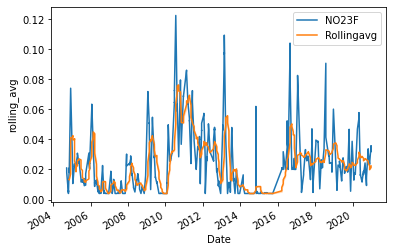

In [2]:
##SAP station
##Mac:
# path = r'/Users/asariversjulien/Documents/Data/CSV files/NERR'
# all_files = glob.glob(path + "/sapdcnut*.csv")

# li = []

# for filename in all_files:
#     df_sap = pd.read_csv(filename, index_col=None, header=0)
#     li.append(df_sap)

# df_sap = pd.concat(li, axis=0, ignore_index=True)

##PC:
path = r'C:/Users/arj26323/Documents/Data/NERR data/Files'
all_files = glob.glob(path + "/sapdcnut*.csv")

li = []

for filename in all_files:
    df_sap = pd.read_csv(filename, index_col=None, header=0)
    li.append(df_sap)

df_sap = pd.concat(li, axis=0, ignore_index=True)

##Begin:
df_sap = df_sap[df_sap['NO23F'] < 0.9] ##removes several extremely large outliers
df_sap['Date'] = pd.to_datetime(df_sap['DateTimeStamp'])
df_sap

##creating a rolling average
df_sap['rolling_avg' ] = df_sap.NO23F.rolling(14).mean()

g = df_sap.plot(kind = 'line', y = 'NO23F', x = 'Date')
sns.lineplot( x = 'Date',
             y = 'rolling_avg',
             data = df_sap,
             label = 'Rollingavg')

<AxesSubplot:xlabel='Date', ylabel='rolling_avg'>

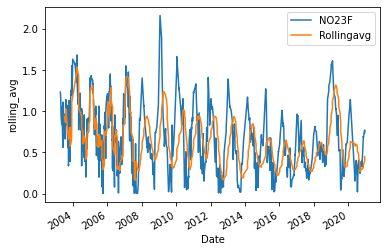

In [3]:
##CBM station
##Mac:
# path = r'/Users/asariversjulien/Documents/Data/CSV files/NERR'
# all_files = glob.glob(path + "/cbmrrnut*.csv")

# li = []

# for filename in all_files:
#     df_cbm = pd.read_csv(filename, index_col=None, header=0)
#     li.append(df_cbm)

# df_cbm = pd.concat(li, axis=0, ignore_index=True)

##PC:
path = r'C:/Users/arj26323/Documents/Data/NERR data/Files'
all_files = glob.glob(path + "/cbmrrnut*.csv")

li = []

for filename in all_files:
    df_cbm = pd.read_csv(filename, index_col=None, header=0)
    li.append(df_cbm)

df_cbm = pd.concat(li, axis=0, ignore_index=True)

##Begin:
df_cbm['Date'] = pd.to_datetime(df_cbm['DateTimeStamp'])
df_cbm

##creating a rolling average
df_cbm['rolling_avg' ] = df_cbm.NO23F.rolling(14).mean()

g = df_cbm.plot(kind = 'line', y = 'NO23F', x = 'Date')
sns.lineplot( x = 'Date',
             y = 'rolling_avg',
             data = df_cbm,
             label = 'Rollingavg')

<AxesSubplot:xlabel='Date', ylabel='rolling_avg'>

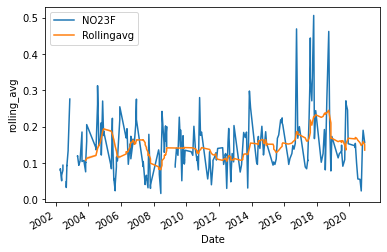

In [4]:
##GRB station
##Mac:
# path = r'/Users/asariversjulien/Documents/Data/CSV files/NERR'
# all_files = glob.glob(path + "/grbsqnut*.csv")

# li = []

# for filename in all_files:
#     df_grb = pd.read_csv(filename, index_col=None, header=0)
#     li.append(df_grb)

# df_grb = pd.concat(li, axis=0, ignore_index=True)

##PC:
path = r'C:/Users/arj26323/Documents/Data/NERR data/Files'
all_files = glob.glob(path + "/grbsqnut*.csv")

li = []

for filename in all_files:
    df_grb = pd.read_csv(filename, index_col=None, header=0)
    li.append(df_grb)

df_grb = pd.concat(li, axis=0, ignore_index=True)

##Begin:
df_grb['Date'] = pd.to_datetime(df_grb['DateTimeStamp'])
df_grb

##creating a rolling average
df_grb['rolling_avg' ] = df_grb.NO23F.rolling(14).mean()

g = df_grb.plot(kind = 'line', y = 'NO23F', x = 'Date')
sns.lineplot( x = 'Date',
             y = 'rolling_avg',
             data = df_grb,
             label = 'Rollingavg')

Text(0, 0.5, 'Nitrate + nitrite (mg/L)')

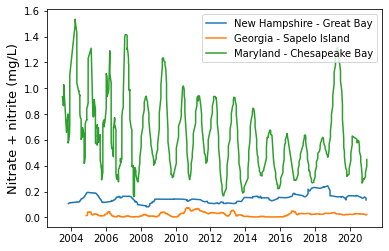

In [5]:
fig, ax = plt.subplots()

sns.lineplot( x = 'Date',
             y = 'rolling_avg',
             data = df_grb,
             label = 'New Hampshire - Great Bay')
sns.lineplot( x = 'Date',
             y = 'rolling_avg',
             data = df_sap,
             label = 'Georgia - Sapelo Island')
sns.lineplot( x = 'Date',
             y = 'rolling_avg',
             data = df_cbm,
             label = 'Maryland - Chesapeake Bay')

fig
plt.xlabel("")
plt.ylabel("Nitrate + nitrite (mg/L)", fontsize = 13)

Text(0, 0.5, 'Nitrate + nitrite (mg/L)')

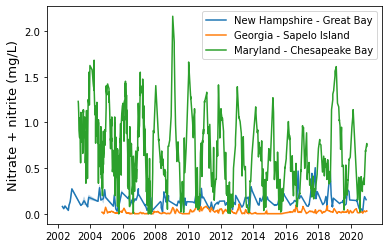

In [6]:
fig2, ax = plt.subplots()

sns.lineplot( x = 'Date',
             y = 'NO23F',
             data = df_grb,
             label = 'New Hampshire - Great Bay')
sns.lineplot( x = 'Date',
             y = 'NO23F',
             data = df_sap,
             label = 'Georgia - Sapelo Island')
sns.lineplot( x = 'Date',
             y = 'NO23F',
             data = df_cbm,
             label = 'Maryland - Chesapeake Bay')

fig2
plt.xlabel("")
plt.ylabel("Nitrate + nitrite (mg/L)", fontsize = 13)

In [14]:
# df = pd.merge(df_sap, df_grb, df_cbm)
# df['Date'] = pd.to_datetime(df['DateTimeStamp'])

# print(len(df['NO23F']))

In [13]:
# # my_path = os.path.abspath('/Users/asariversjulien/Documents/Georgia/Project') ##mac
# my_path = os.path.expanduser('~/Downloads') ##pc
# my_file = 'nuts.png'
# fig2.savefig(os.path.join(my_path, my_file), bbox_inches = 'tight', dpi = 300)